In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/wadi/Total_cases_India.csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed Deaths': 'India Deaths', \
                                  'Confirmed Rcovered': 'India Recovered'})

In [4]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,India Confirmed Cases,India Deaths,India Recovered
4,01/26/2020,0,0,0
5,01/27/2020,0,0,0
6,01/28/2020,0,0,0
7,01/29/2020,0,0,0
8,01/30/2020,1,0,0


In [0]:
india_confirmed_cases = raw_seq['India Confirmed Cases']
india_deaths = raw_seq['India Deaths']
india_recovered = raw_seq['India Recovered']

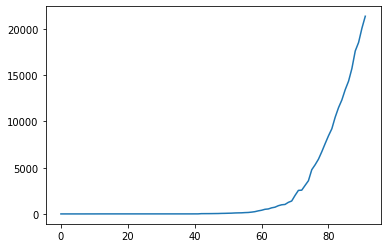

In [6]:
raw_seq['India Confirmed Cases'].plot()

In [7]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_confirmed_cases)
pred_val = []
for i in range(x):
  i=india_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

Using TensorFlow backend.


1/1 [==============================] - 0s 13ms/step
[[1.8940935]]
1/1 [==============================] - 0s 671us/step
[[1.8940935]]
1/1 [==============================] - 0s 612us/step
[[1.8940935]]
1/1 [==============================] - 0s 2ms/step
[[1.8940935]]
1/1 [==============================] - 0s 4ms/step
[[1.8940935]]
1/1 [==============================] - 0s 726us/step
[[1.8940935]]
1/1 [==============================] - 0s 607us/step
[[1.8940935]]
1/1 [==============================] - 0s 1ms/step
[[1.8940935]]
1/1 [==============================] - 0s 845us/step
[[4.923611]]
1/1 [==============================] - 0s 868us/step
[[4.923611]]
1/1 [==============================] - 0s 850us/step
[[4.923611]]
1/1 [==============================] - 0s 818us/step
[[7.1237288]]
1/1 [==============================] - 0s 641us/step
[[8.893687]]
1/1 [==============================] - 0s 1ms/step
[[8.893687]]
1/1 [==============================] - 0s 892us/step
[[8.893687]]
1/1 [=====

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [9]:
print(t1)

         Dates  India Confirmed Cases  ...  India Recovered  Predicted Cases
0   01/22/2020                      0  ...                0         1.894094
1   01/23/2020                      0  ...                0         1.894094
2   01/24/2020                      0  ...                0         1.894094
3   01/25/2020                      0  ...                0         1.894094
4   01/26/2020                      0  ...                0         1.894094
..         ...                    ...  ...              ...              ...
87  04/18/2020                  15722  ...             2463     17123.212891
88  04/19/2020                  17615  ...             2854     19183.697266
89  04/20/2020                  18539  ...             3273     20189.443359
90  04/21/2020                  20080  ...             3975     21866.779297
91  04/22/2020                  21370  ...             4370     23270.912109

[92 rows x 5 columns]


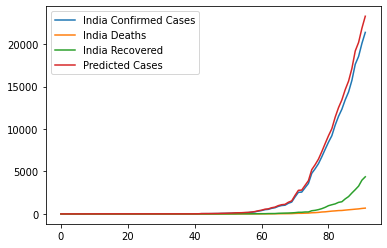

In [10]:
t1.plot()

In [11]:
# India Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_deaths)
pred_val = []
for i in range(x):
  i=india_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 10ms/step
[[1.3547008]]
1/1 [==============================] - 0s 862us/step
[[1.3547008]]
1/1 [==============================] - 0s 2ms/step
[[1.3547008]]
1/1 [==============================] - 0s 5ms/step
[[1.3547008]]
1/1 [==============================] - 0s 1ms/step
[[1.3547008]]
1/1 [==============================] - 0s 1ms/step
[[1.3547008]]
1/1 [==============================] - 0s 1ms/step
[[1.3547008]]
1/1 [==============================] - 0s 730us/step
[[1.3547008]]
1/1 [==============================] - 0s 1ms/step
[[1.3547008]]
1/1 [==============================] - 0s 748us/step
[[1.3547008]]
1/1 [==============================] - 0s 2ms/step
[[1.3547008]]
1/1 [==============================] - 0s 2ms/step
[[1.3547008]]
1/1 [==============================] - 0s 965us/step
[[1.3547008]]
1/1 [==============================] - 0s 885us/step
[[1.3547008]]
1/1 [==============================] - 0s 1ms/step
[[1.3547008]]
1/1 [=========

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [13]:
print(t2)

         Dates  India Confirmed Cases  ...  Predicted Cases  Predicted Deaths
0   01/22/2020                      0  ...         1.894094          1.354701
1   01/23/2020                      0  ...         1.894094          1.354701
2   01/24/2020                      0  ...         1.894094          1.354701
3   01/25/2020                      0  ...         1.894094          1.354701
4   01/26/2020                      0  ...         1.894094          1.354701
..         ...                    ...  ...              ...               ...
87  04/18/2020                  15722  ...     17123.212891        576.304810
88  04/19/2020                  17615  ...     19183.697266        617.965942
89  04/20/2020                  18539  ...     20189.443359        654.145264
90  04/21/2020                  20080  ...     21866.779297        712.251404
91  04/22/2020                  21370  ...     23270.912109        751.719788

[92 rows x 6 columns]


In [14]:
t2.tail(10)

,Dates,India Confirmed Cases,India Deaths,India Recovered,Predicted Cases,Predicted Deaths
82,04/13/2020,10453,358,1181,11388.052734,397.601105
83,04/14/2020,11487,393,1359,12513.532227,435.973083
84,04/15/2020,12322,405,1432,13422.408203,449.129242
85,04/16/2020,13430,448,1768,14628.434570,496.271912
86,04/17/2020,14352,486,2041,15632.006836,537.932922
87,04/18/2020,15722,521,2463,17123.212891,576.304810
88,04/19/2020,17615,559,2854,19183.697266,617.965942
89,04/20/2020,18539,592,3273,20189.443359,654.145264
90,04/21/2020,20080,645,3975,21866.779297,712.251404
91,04/22/2020,21370,681,4370,23270.912109,751.719788


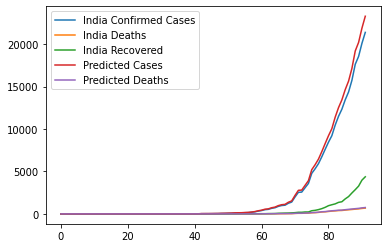

In [15]:
t2.plot()

In [16]:
# India Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_recovered)
pred_val = []
for i in range(x):
  i=india_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 10ms/step
[[1.5656675]]
1/1 [==============================] - 0s 835us/step
[[1.5656675]]
1/1 [==============================] - 0s 3ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 2ms/step
[[1.5656675]]
1/1 [==============================] - 0s 591us/step
[[1.5656675]]
1/1 [==============================] - 0s 748us/step
[[1.5656675]]
1/1 [==============================] - 0s 1ms/step
[[1.5656675]]
1/1 [==============================] - 0s 762us/step
[[1.5656675]]
1/1 [==============================] - 0s 712us/step
[[1.5656675]]
1/1 [==============================] - 0s 843us/step
[[1.5656675]]
1/1 [=======

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t3 = raw_seq

In [18]:
print(t3)

         Dates  India Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                      0  ...          1.354701             1.565668
1   01/23/2020                      0  ...          1.354701             1.565668
2   01/24/2020                      0  ...          1.354701             1.565668
3   01/25/2020                      0  ...          1.354701             1.565668
4   01/26/2020                      0  ...          1.354701             1.565668
..         ...                    ...  ...               ...                  ...
87  04/18/2020                  15722  ...        576.304810          3128.175049
88  04/19/2020                  17615  ...        617.965942          3624.062744
89  04/20/2020                  18539  ...        654.145264          4155.461914
90  04/21/2020                  20080  ...        712.251404          5045.777344
91  04/22/2020                  21370  ...        751.719788          5546.737305

[92 rows x 7 co

In [19]:
t3.tail(10)

,Dates,India Confirmed Cases,India Deaths,India Recovered,Predicted Cases,Predicted Deaths,Predicted Recovered
82,04/13/2020,10453,358,1181,11388.052734,397.601105,1502.272339
83,04/14/2020,11487,393,1359,12513.532227,435.973083,1728.021851
84,04/15/2020,12322,405,1432,13422.408203,449.129242,1820.604248
85,04/16/2020,13430,448,1768,14628.434570,496.271912,2246.737793
86,04/17/2020,14352,486,2041,15632.006836,537.932922,2592.971924
87,04/18/2020,15722,521,2463,17123.212891,576.304810,3128.175049
88,04/19/2020,17615,559,2854,19183.697266,617.965942,3624.062744
89,04/20/2020,18539,592,3273,20189.443359,654.145264,4155.461914
90,04/21/2020,20080,645,3975,21866.779297,712.251404,5045.777344
91,04/22/2020,21370,681,4370,23270.912109,751.719788,5546.737305


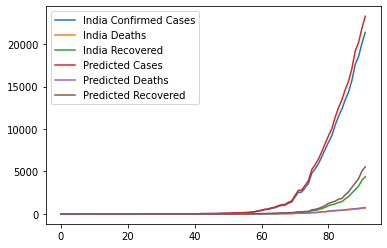

In [20]:
t3.plot()

In [0]:
t3.to_csv (r'/content/drive/My Drive/india_og_preds.csv', index = False, header=True)

In [22]:
'''errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])
mape= np.mean(100*(errors/confirmed_cases))
Accuracy=100-mape
Accuracy'''

"errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])\nmape= np.mean(100*(errors/confirmed_cases))\nAccuracy=100-mape\nAccuracy"

In [23]:
pd.set_option('display.max_rows', t3.shape[0]+1)
print(t3)

         Dates  India Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                      0  ...          1.354701             1.565668
1   01/23/2020                      0  ...          1.354701             1.565668
2   01/24/2020                      0  ...          1.354701             1.565668
3   01/25/2020                      0  ...          1.354701             1.565668
4   01/26/2020                      0  ...          1.354701             1.565668
5   01/27/2020                      0  ...          1.354701             1.565668
6   01/28/2020                      0  ...          1.354701             1.565668
7   01/29/2020                      0  ...          1.354701             1.565668
8   01/30/2020                      1  ...          1.354701             1.565668
9   01/31/2020                      1  ...          1.354701             1.565668
10  02/01/2020                      1  ...          1.354701             1.565668
11  02/02/2020  

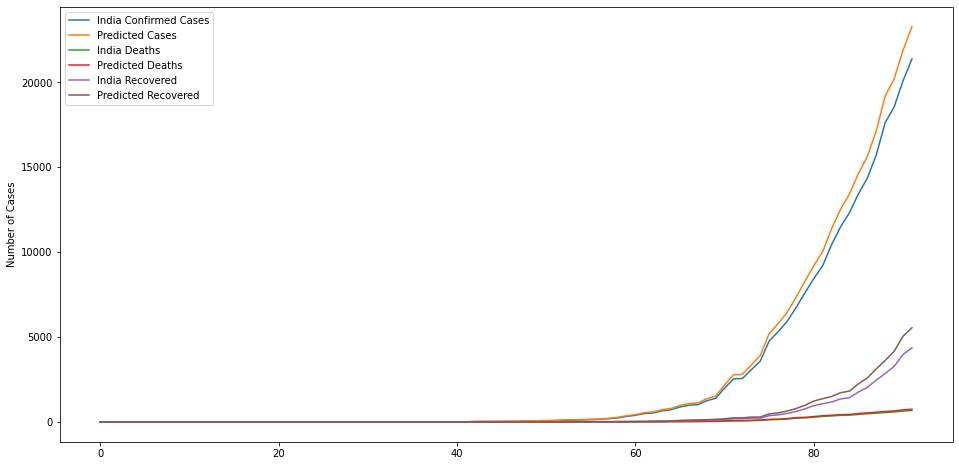

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['India Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
plt.plot(t3['India Deaths'])
plt.plot(t3['Predicted Deaths'])
plt.plot(t3['India Recovered'])
plt.plot(t3['Predicted Recovered'])
plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

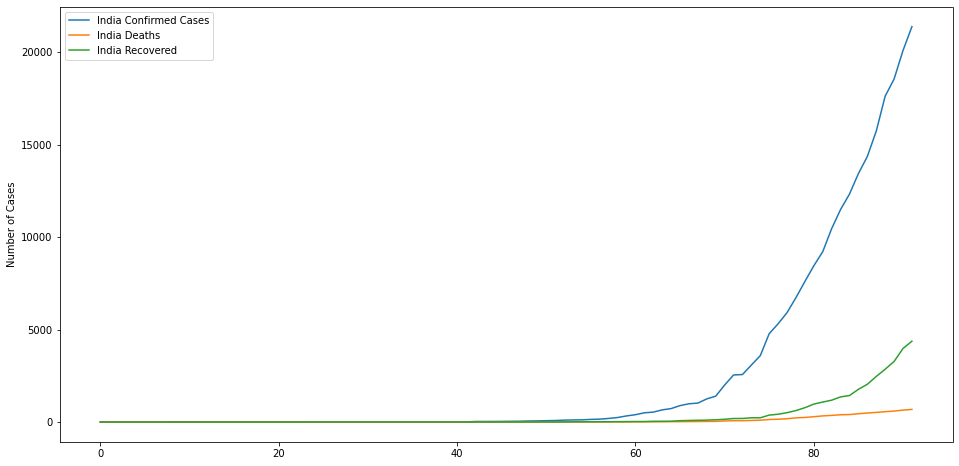

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['India Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t3['India Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t3['India Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['India Confirmed Cases', 'India Deaths', 'India Recovered'], loc='upper left')
plt.show()

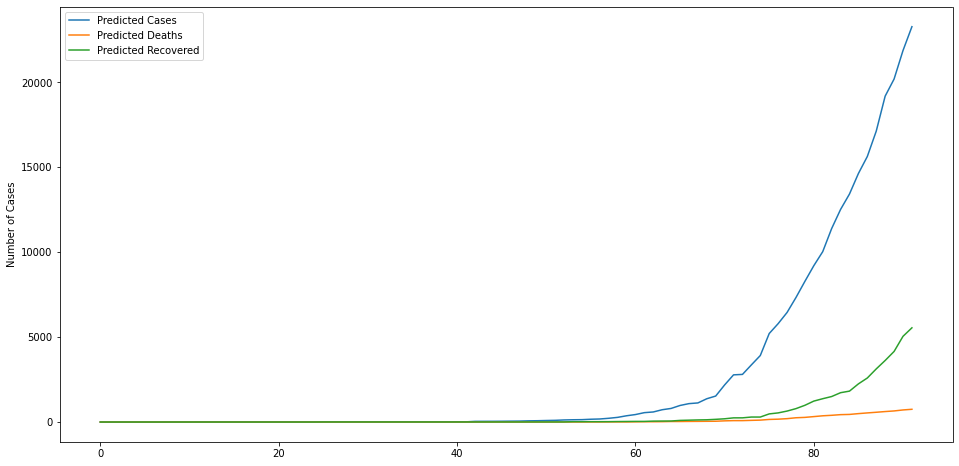

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t3['Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t3['Predicted Recovered'])
plt.legend(['Predicted Cases', 'Predicted Deaths', 'Predicted Recovered'], loc='upper left')
plt.show()

In [0]:
newplot = t3.iloc[53:63]

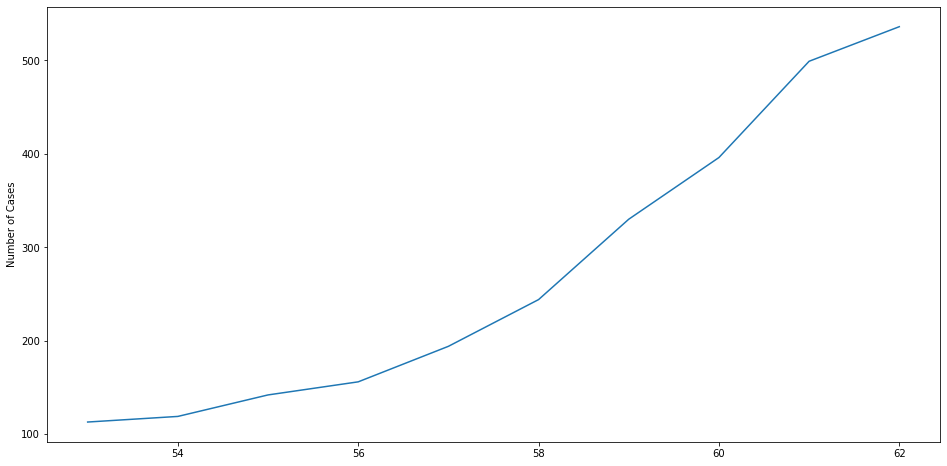

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
newplot = t3['India Confirmed Cases'].iloc[53:63]
plt.plot(newplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [29]:
newplot

53    113
54    119
55    142
56    156
57    194
58    244
59    330
60    396
61    499
62    536
Name: India Confirmed Cases, dtype: int64

In [30]:
dates = t3['Dates'].iloc[53:63]
dates
newplot2 = pd.DataFrame(newplot.to_frame().join(dates))
newplot2
#newplot2.info()

,India Confirmed Cases,Dates
53,113,03/15/2020
54,119,03/16/2020
55,142,03/17/2020
56,156,03/18/2020
57,194,03/19/2020
58,244,03/20/2020
59,330,03/21/2020
60,396,03/22/2020
61,499,03/23/2020
62,536,03/24/2020


In [0]:
newplot2.set_index('Dates', inplace=True)

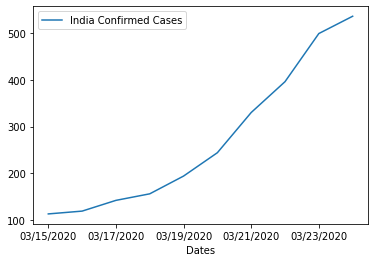

In [32]:
newplot2.plot()

In [33]:
newplot2['India Confirmed Cases'][3]

156

In [34]:
percent_rise = (newplot2['India Confirmed Cases'][9] - newplot2['India Confirmed Cases'][0]) / newplot2['India Confirmed Cases'][9] 
percent_rise
total_rise = percent_rise * 100
total_rise

78.9179104477612

In [0]:
postplot = t3.iloc[63:73]

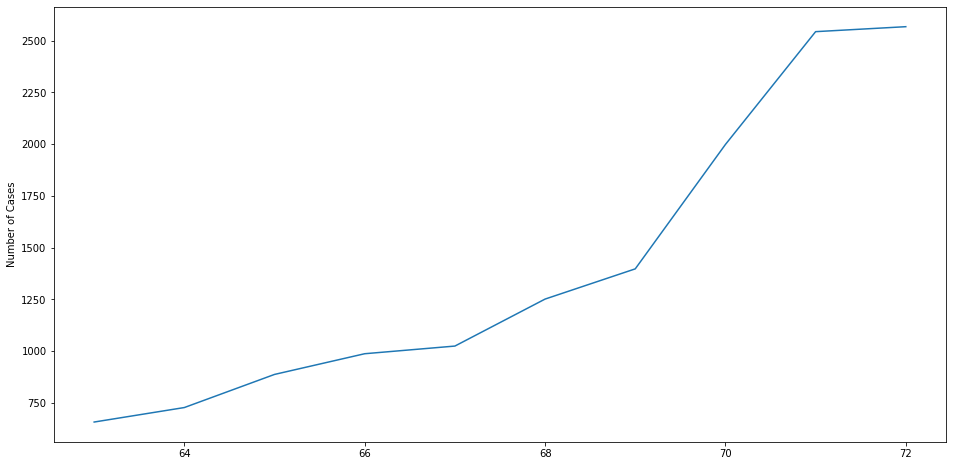

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
postplot = t3['India Confirmed Cases'].iloc[63:73]
plt.plot(postplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [37]:
dates2 = t3['Dates'].iloc[63:73]
dates2
postplot2 = pd.DataFrame(postplot.to_frame().join(dates2))
postplot2.set_index('Dates', inplace=True)
postplot2
#newplot2.info()

,India Confirmed Cases
Dates,
03/25/2020,657
03/26/2020,727
03/27/2020,887
03/28/2020,987
03/29/2020,1024
03/30/2020,1251
03/31/2020,1397
04/01/2020,1998
04/02/2020,2543


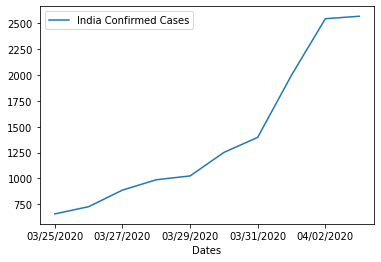

In [38]:
postplot2.plot()

In [39]:
percent_rise2 = (postplot2['India Confirmed Cases'][9] - postplot2['India Confirmed Cases'][0]) / postplot2['India Confirmed Cases'][9] 
percent_rise2
total_rise2 = percent_rise2 * 100
total_rise2


74.40592130892092

In [40]:
confirmed_cases_beforelockdown = total_rise
confirmed_cases_afterlockdown = total_rise2
prevented_cases = (newplot2['India Confirmed Cases'][9] - newplot2['India Confirmed Cases'][0])

if confirmed_cases_beforelockdown < confirmed_cases_afterlockdown:
   print("%s percent rise is greater than   %s percent rise" % (confirmed_cases_afterlockdown, confirmed_cases_beforelockdown))
else:
   print("%s percent rise is smaller than  %s percent rise" % (confirmed_cases_afterlockdown, confirmed_cases_beforelockdown))
  
print("The preferred Lockdown date to avoid more casualities would be 15th March")
print("Number of cases that could have been prevented: %s" % (prevented_cases))

74.40592130892092 percent rise is smaller than  78.9179104477612 percent rise
The preferred Lockdown date to avoid more casualities would be 15th March
Number of cases that could have been prevented: 423


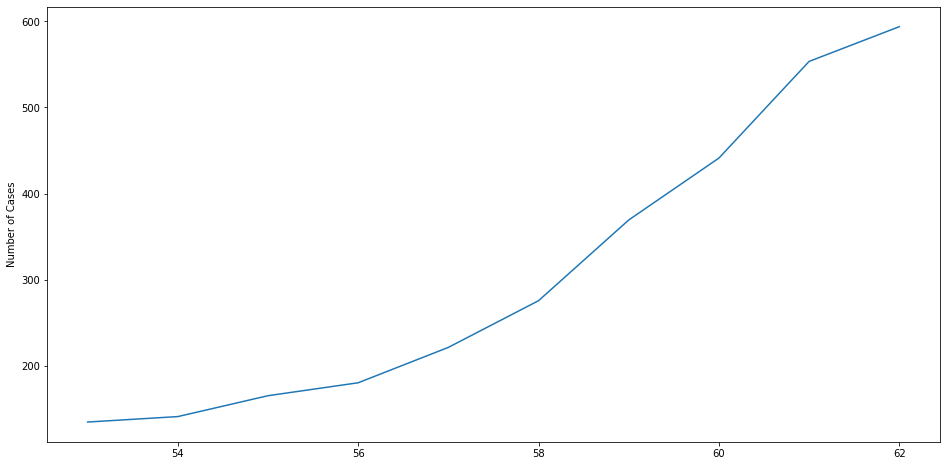

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
predictplot = t3['Predicted Cases']
predictplot = predictplot.iloc[53:63]
plt.plot(predictplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [42]:
postdates = t3['Dates'].iloc[53:63]
postdates
#newplot2.info()

53    03/15/2020
54    03/16/2020
55    03/17/2020
56    03/18/2020
57    03/19/2020
58    03/20/2020
59    03/21/2020
60    03/22/2020
61    03/23/2020
62    03/24/2020
Name: Dates, dtype: object

In [43]:
predplot2 = pd.DataFrame(predictplot.to_frame().join(postdates))
predplot2.set_index('Dates', inplace=True)
predplot2

,Predicted Cases
Dates,
03/15/2020,135.063751
03/16/2020,141.383804
03/17/2020,165.610687
03/18/2020,180.612793
03/19/2020,221.672623
03/20/2020,275.830505
03/21/2020,369.439240
03/22/2020,441.278381
03/23/2020,553.391113


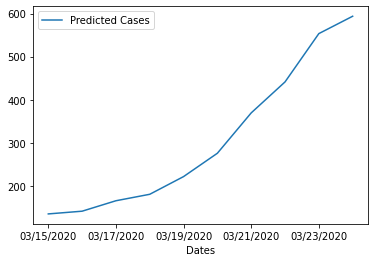

In [44]:
predplot2.plot()

In [45]:
prediction_percent = (predplot2['Predicted Cases'][9] - predplot2['Predicted Cases'][0]) / predplot2['Predicted Cases'][9] 
prediction_percent
prediction_rise = prediction_percent * 100
prediction_rise

77.24915146827698

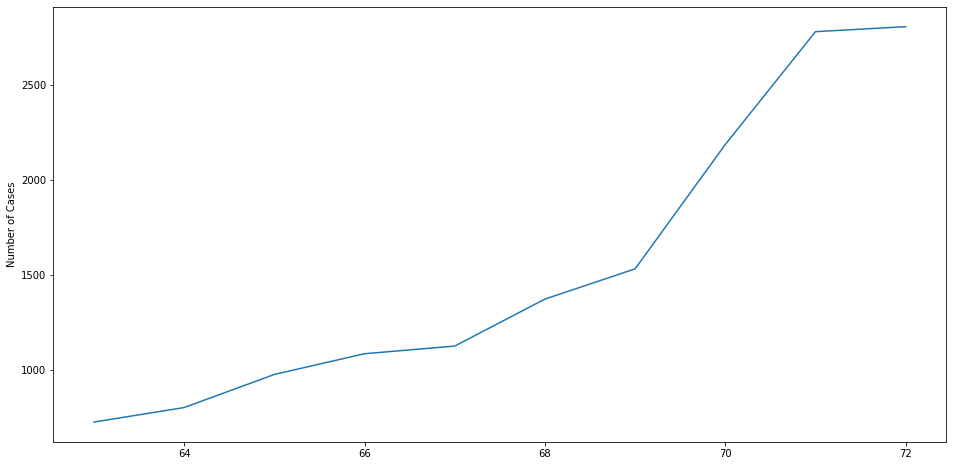

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
predictplot_afterlock = t3['Predicted Cases']
predictplot_afterlock = predictplot_afterlock.iloc[63:73]
plt.plot(predictplot_afterlock)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [47]:
postdates_afterlock = t3['Dates'].iloc[63:73]
postdates_afterlock
#newplot2.info()

63    03/25/2020
64    03/26/2020
65    03/27/2020
66    03/28/2020
67    03/29/2020
68    03/30/2020
69    03/31/2020
70    04/01/2020
71    04/02/2020
72    04/03/2020
Name: Dates, dtype: object

In [48]:
predplot3 = pd.DataFrame(predictplot_afterlock.to_frame().join(postdates_afterlock))
predplot3.set_index('Dates', inplace=True)
predplot3

,Predicted Cases
Dates,
03/25/2020,725.369934
03/26/2020,801.563049
03/27/2020,975.718750
03/28/2020,1084.565796
03/29/2020,1124.839478
03/30/2020,1371.922729
03/31/2020,1530.839844
04/01/2020,2185.012207
04/02/2020,2778.229980


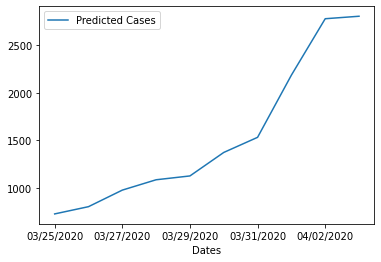

In [49]:
predplot3.plot()

In [50]:
predictplot_afterlock

63     725.369934
64     801.563049
65     975.718750
66    1084.565796
67    1124.839478
68    1371.922729
69    1530.839844
70    2185.012207
71    2778.229980
72    2804.353271
Name: Predicted Cases, dtype: float32

In [51]:
prediction_percent_afterlock = (predplot3['Predicted Cases'][9] - predplot3['Predicted Cases'][0]) / predplot3['Predicted Cases'][9] 
prediction_percent_afterlock
prediction_rise_afterlock = prediction_percent_afterlock * 100
prediction_rise_afterlock

74.13414716720581

In [52]:
print("The percentage rise from 15th march to 25th march: %s " % (prediction_rise))
print("The percentage rise from 25th march to 3rd april: %s " % (prediction_rise_afterlock))

The percentage rise from 15th march to 25th march: 77.24915146827698 
The percentage rise from 25th march to 3rd april: 74.13414716720581 


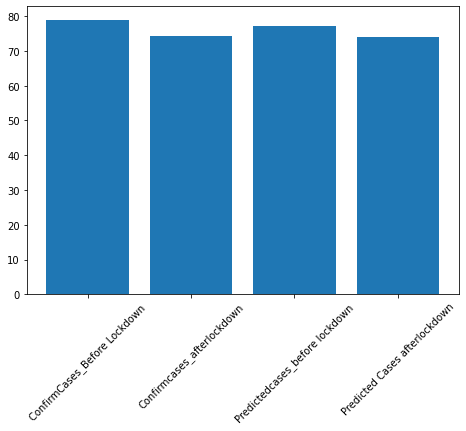

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cases = ['ConfirmCases_Before Lockdown', 'Confirmcases_afterlockdown', 'Predictedcases_before lockdown', 'Predicted Cases afterlockdown']
percent = [total_rise, total_rise2, prediction_rise, prediction_rise_afterlock]
ax.bar(cases,percent)
plt.xticks(rotation=45)
plt.show()

In [0]:
xc = newplot2['India Confirmed Cases'][0]
xl=newplot2['India Confirmed Cases'][9]

In [55]:
cv= total_rise2
cv

74.40592130892092

In [56]:
temp = (100 * xc) / (100 - cv)
Case_prevented= xl - temp
print("For Real Model:")
print('Total confirmed cases which could have been prevented if the lockdown started at 15th March:', Case_prevented)
print('The number of cases it would have been till 25th march if lockdown started on 15th march:', temp)

For Real Model:
Total confirmed cases which could have been prevented if the lockdown started at 15th March: 94.49162861491624
The number of cases it would have been till 25th march if lockdown started on 15th march: 441.50837138508376


Concluded Numbers for Prediction Scores

In [0]:
p1 = predplot2['Predicted Cases'][0]
p2 = predplot2['Predicted Cases'][9]

In [58]:
cv2 = prediction_rise
cv2

77.24915146827698

In [59]:
a = 100 * p1
b = 100 - cv2
temp2 = a / b
cases_prevented_prediction = 594 - temp2
print("For Prediciton model supporting our real-time theory:")
print("Total predicted cases which could have been prevented in the future if lockdown started at 15th March", cases_prevented_prediction)
print('The number of cases there would be on 25th march if lockdown started on 15th march:', temp2)

For Prediciton model supporting our real-time theory:
Total predicted cases which could have been prevented in the future if lockdown started at 15th March 0.3353240105539044
The number of cases there would be on 25th march if lockdown started on 15th march: 593.6646759894461


In [61]:
from sklearn.metrics import r2_score
score = r2_score(t3['India Confirmed Cases'], t3['Predicted Cases'])
score

0.9901390257768201

In [62]:
from sklearn.metrics import r2_score
score1 = r2_score(t3['India Deaths'], t3['Predicted Deaths'])
score1

0.9851250552310015

In [63]:
from sklearn.metrics import r2_score
score3 = r2_score(t3['India Recovered'], t3['Predicted Recovered'])
score3

0.9152102014988904

In [66]:
Average = (score + score1 + score3) / 3
Average


0.9634914275022374